# MusicBox Basic Workflow Tutorial

Hello, and welcome to the MusicBox basic workflow tutorial! Here, we will be covering some basic usages of the MusicBox library.

## What is MusicBox?

MusicBox is a library with a Python API for box modeling that builds on top of MUSICA, a collection of modeling software that allows for robust modeling of chemistry in Earth's atmosphere.</br>
Boxes refer to a set of adjacent grid cells that represent the exchange of information.

## 1. Creating a Conda Environment

Before getting started, you will need a conda environment set up. To do this, execute these commands in your terminal:

```
conda create --name music_box python=3.9
conda activate music_box
conda install ipykernel scikit-learn seaborn
```

## 2. Downloading MusicBox

To install MusicBox onto your device, run

```
pip install acom_music_box
```

<b>Note:</b> Installing MusicBox will automatically install MUSICA, a required dependency of MusicBox that is used throughout this tutorial.

## 3. Importing MusicBox

To import your newly-downloaded MusicBox into a Python file, as well as some other libraries so that this demo can run:

In [1]:
from acom_music_box import MusicBox, Conditions
import musica.mechanism_configuration as mc
import matplotlib.pyplot as plt

This code cell may take upwards of 2 minutes to run on the first execution depending on your system, so do not fret if it feels a bit sluggish at first.

## 4. Defining a System

In MusicBox, a system is defined by a mechanism that includes:
* a set of species and their respective phases, and
* a set of reactions that the species participate in.

The system is the fundamental building block of MusicBox and is your main concern when using this library.</br>
The following steps will walk you through:
* creating your own system,
* solving your system, and
* viewing and visualizing your results.</br>

### 4a. Defining Species

A species is simply a reactant or product in a chemical reaction.</br>
You have the freedom to name a species anything in MusicBox, just make sure that it is logical to you.</br>
For extended documentation about the Species class, go [here](https://ncar.github.io/musica/api/python.html#musica.mechanism_configuration.Species).</br>
Here is a snippet that defines three chemical species:

In [2]:
# Create each of the species that will be simulated
X = mc.Species(name="X")
Y = mc.Species(name="Y")
Z = mc.Species(name="Z")
species = {"X": X, "Y": Y, "Z": Z}
gas = mc.Phase(name="gas", species=list(species.values()))

This code block creates 3 species called X, Y, and Z and adds them to a dictionary called species.</br>
The variable name and the name of the species are not required to be the same, but it is strongly recommended so that your code is more organized.</br>
Next, a phase is created named "gas". In MusicBox, phases are essentially collections of species that are assumed to be well-mixed.</br>
<b>Note:</b> Creating the species dictionary and the phase is mandatory, as subsequent code relies on the data being bundled in specific object types.

### 4b. Defining Reactions

A chemical reaction is a process in which a set of reactants transforms into a set of products.</br>
To define a reaction in MusicBox:

In [3]:
# Create the reactions that the species undergo in the
arr1 = mc.Arrhenius(name="X->Y", A=4.0e-3, C=50, reactants=[species["X"]], products=[species["Y"]], gas_phase=gas)
arr2 = mc.Arrhenius(name="Y->Z", A=4.0e-3, C=50, reactants=[species["Y"]], products=[species["Z"]], gas_phase=gas)
rxns = {"X->Y": arr1, "Y->Z": arr2}

This code block uses the gas and species variables from the previous code block.</br>
Using the species and gas variables, it creates two reactions: arr1 and arr2.</br>
The arr1 variable represents the conversion of X (reactant) into Y (product) and defines Arrhenius rate constant parameters A and C.</br>
The arr2 variable is just like arr1, but instead it represents the conversion of Y (reactant) into Z (product).</br>
These reactions are then bundled into a dictionary called rxns just like the species before.</br>
More information on the Arrhenius reaction can be found [here](https://ncar.github.io/musica/api/python.html#musica.mechanism_configuration.Arrhenius).</br>
<b>Note:</b> MusicBox allows for users to experiment with an array of reaction types.</br>
Go [here](https://ncar.github.io/musica/api/python.html#module-musica.mechanism_configuration) to view a list of supported reactions and their parameters.

### 4c. Defining Mechanisms

A mechanism represents a set of species with their respective phases and reactions.</br>
For extended documentation about the Mechanism class, go [here](https://ncar.github.io/musica/api/python.html#musica.mechanism_configuration.Mechanism).</br>
To create a mechanism in MusicBox:

In [4]:
# Create the mechanism that is defined by the species, phases, and reactions
mechanism = mc.Mechanism(name="tutorial_mechanism", species=list(species.values()), phases=[gas], reactions=list(rxns.values()))

This code block builds upon the previous two functions, using the previously-created species, phases, and reactions as arguments.</br>
It simply creates a mechanism variable that represents an instance of the Mechanism class.</br>
The mechanism is first given a name, then the species, phase, and reactions are passed into their respective arguments.

## 5. Creating a Box Model

Box models allow you to solve your previously-created mechanism under conditions that can change the reactions' rates over time.</br>
Each instance of the MusicBox class acts as an independent box model.</br>
You can also define the length of the simulations and the time steps.</br>
To initialize a new box model:

In [5]:
# Create the box model that contains the mechanism
box_model = MusicBox()
box_model.load_mechanism(mechanism)

This code block is straightforward, simply creating an instance of the MusicBox class and then loading the mechanism as an argument for the box model.

### 5a. Adding Initial Conditions to Your Box Model

The initial conditions of the model define the environment the mechanism takes place in at the start of the simulation.</br>
Some conditions that are recommended to define for your system include:
* the temperature, measured in Kelvin (K),
* the pressure, measured in Pascals (Pa), and
* the concentration of each of the species, measured in mol/m<sup>3</sup>.

For extended documentation about the Conditions class, go [here](https://ncar.github.io/musica/api/python.html#musica.types.Conditions).</br>
To set the initial conditions of your box model:

In [6]:
# Set the conditions of the box model at time = 0 s
box_model.initial_conditions = Conditions(
    temperature=298.15, # Units: Kelvin (K)
    pressure=101325.0, # Units: Pascals (Pa)
    species_concentrations={ # Units: mol/m^3
        "X": 3.75,
        "Y": 5.0,
        "Z": 2.5,
    }
)

This code block sets the box model's initial_conditons attribute.</br>
In the condition class, you should provide a temperature, pressure, air density (unless you just want it based on the Ideal Gas Law, which is the default), and each of the species' concentrations as arguments.

### 5b. Adding Evolving Conditions to Your Box Model

An evolving condition will change the environment of the mechanism at the defined time value.</br>
These changes can include species concentration, temperature, pressure, et cetera.</br>
To create an evolving condition for your box model:

In [7]:
# Set the box model conditions at the defined time
box_model.add_evolving_condition(
    100.0, # Units: Seconds (s)
    Conditions(
        temperature=75.0, # Units: Kelvin (K)
        pressure=100100.0 # Units: Pascals (Pa)
    )
)

This code block is similar to the previous one for setting the initial conditions.</br>
Just like in the previous code block, a Conditions object is created as an argument for the box model's <i>add_evolving_condition()</i> function.</br>
However, there is now a new value put at the very beginning of the function that represents the time at which the evolving conditions takes place at.

### 5c. Additional Box Model Configuration

Box models contain some additional configuration options that need to be defined.</br>
These include:
* the simulation length,
* the chemistry step time, and
* the output step time.

To set these configurations for your box model:

In [8]:
# Set the additional configuration options for the box model
box_model.box_model_options.simulation_length = 200 # Units: Seconds (s)
box_model.box_model_options.chem_step_time = 1 # Units: Seconds (s)
box_model.box_model_options.output_step_time = 20 # Units: Seconds (s)

This code block sets some of the attributes of the box model's options, including:</br>
* <b>simulation_length:</b> the number of time steps that the simulation lasts for,
* <b>chem_step_time:</b> the number of time steps between each simulation calculation, and
* <b>output_step_time:</b> the number of time steps between each output of the model.

All three of these have seconds as their unit.

## 6. Running and Solving Your Box Model

Now, you are able to run and solve your newly-created box model.</br>
To solve your box model, simply call its <i>solve()</i> function:

In [9]:
df = box_model.solve()

## 7. View Outputs and Visualizations

MusicBox supports viewing your simulation's outputs as well as visualizing them.</br>
To view your solved model's data and a basic visualization of it:

,time.s,ENV.temperature.K,ENV.pressure.Pa,ENV.air number density.mol m-3,CONC.X.mol m-3,CONC.Y.mol m-3,CONC.Z.mol m-3
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,100.000000,196.718182,100768.181818,95.260162,2.317568,4.042961,4.889471
std,66.332496,116.536287,639.735386,62.484892,0.898198,0.762282,1.652704
min,0.000000,75.000000,100100.000000,40.874045,1.072110,2.771899,2.500000
25%,50.000000,75.000000,100100.000000,40.874045,1.587575,3.476560,3.640977
50%,100.000000,298.150000,101325.000000,40.874045,2.336660,4.220865,4.692475
75%,150.000000,298.150000,101325.000000,160.523503,2.963461,4.645562,6.185864
max,200.000000,298.150000,101325.000000,160.523503,3.750000,5.000000,7.405991


,time.s,ENV.temperature.K,ENV.pressure.Pa,ENV.air number density.mol m-3,CONC.X.mol m-3,CONC.Y.mol m-3,CONC.Z.mol m-3
0,0.0,298.15,101325.0,40.874045,3.750000,5.000000,2.500000
1,20.0,298.15,101325.0,40.874045,3.411490,4.871403,2.967107
2,40.0,298.15,101325.0,40.874045,3.103538,4.725280,3.421182
3,60.0,298.15,101325.0,40.874045,2.823383,4.565844,3.860773
4,80.0,298.15,101325.0,40.874045,2.568519,4.396687,4.284794
5,100.0,298.15,101325.0,40.874045,2.336660,4.220865,4.692475
6,120.0,75.00,100100.0,160.523503,1.999514,3.923416,5.327070
7,140.0,75.00,100100.0,160.523503,1.711012,3.623931,5.915056
8,160.0,75.00,100100.0,160.523503,1.464138,3.329190,6.456672
9,180.0,75.00,100100.0,160.523503,1.252884,3.044058,6.953058


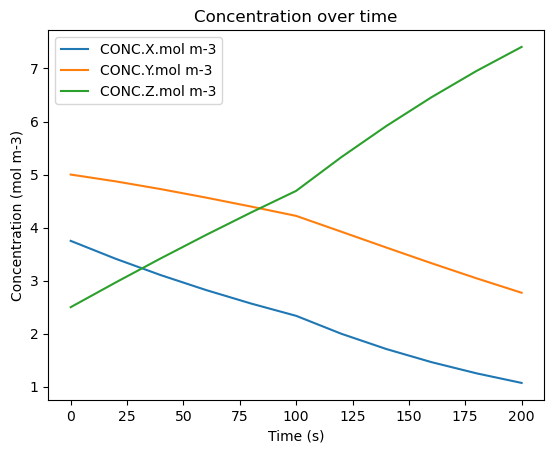

In [10]:
display(df.describe())
display(df)
df.plot(x='time.s', y=['CONC.X.mol m-3', 'CONC.Y.mol m-3', 'CONC.Z.mol m-3'], title='Concentration over time', ylabel='Concentration (mol m-3)', xlabel='Time (s)')
plt.show()

This code block prints out the output of the simulation that was just ran as well as it utilizing Python's matplotlib library to visualize it.</br>
To do so, the <i>plot()</i> function is called, with the desired independent variable (time) and dependent variables (concentration of each species) being passed in.</br>
The plot is also given a title as well as a label for both the x-axis and the y-axis.</br>
Lastly, the <i>show()</i> function is called so that you can see the plot directly above this text.</br>
<b>Note: If you are running this code in a terminal, you will need to replace every <i>display()</i> statement with a <i>print()</i> statement.